# Lambda School Data Science Unit 4 Sprint Challenge 4

## RNNs, CNNs, AutoML, and more...

In this sprint challenge, you'll explore some of the cutting edge of Data Science.

*Caution* - these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Part 1 - RNNs

Use an RNN to fit a simple classification model on tweets to distinguish from tweets from Austen Allred and tweets from Weird Al Yankovic.

Following is code to scrape the needed data (no API auth needed, uses [twitterscraper](https://github.com/taspinar/twitterscraper)):

In [6]:
!pip install twitterscraper

In [7]:
from twitterscraper import query_tweets

austen_tweets = query_tweets('from:austen', 1000)
len(austen_tweets)

INFO: queries: ['from:austen since:2006-03-21 until:2006-11-14', 'from:austen since:2006-11-14 until:2007-07-11', 'from:austen since:2007-07-11 until:2008-03-05', 'from:austen since:2008-03-05 until:2008-10-30', 'from:austen since:2008-10-30 until:2009-06-25', 'from:austen since:2009-06-25 until:2010-02-19', 'from:austen since:2010-02-19 until:2010-10-15', 'from:austen since:2010-10-15 until:2011-06-11', 'from:austen since:2011-06-11 until:2012-02-04', 'from:austen since:2012-02-04 until:2012-09-30', 'from:austen since:2012-09-30 until:2013-05-26', 'from:austen since:2013-05-26 until:2014-01-20', 'from:austen since:2014-01-20 until:2014-09-15', 'from:austen since:2014-09-15 until:2015-05-12', 'from:austen since:2015-05-12 until:2016-01-05', 'from:austen since:2016-01-05 until:2016-08-31', 'from:austen since:2016-08-31 until:2017-04-26', 'from:austen since:2017-04-26 until:2017-12-21', 'from:austen since:2017-12-21 until:2018-08-16', 'from:austen since:2018-08-16 until:2019-04-12']
INFO

181

In [8]:
austen_tweets[0].text

'I love love love working with great people.pic.twitter.com/fCKOm6Vl'

In [9]:
al_tweets = query_tweets('from:AlYankovic', 1000)
len(al_tweets)

INFO: queries: ['from:AlYankovic since:2006-03-21 until:2006-11-14', 'from:AlYankovic since:2006-11-14 until:2007-07-11', 'from:AlYankovic since:2007-07-11 until:2008-03-05', 'from:AlYankovic since:2008-03-05 until:2008-10-30', 'from:AlYankovic since:2008-10-30 until:2009-06-25', 'from:AlYankovic since:2009-06-25 until:2010-02-19', 'from:AlYankovic since:2010-02-19 until:2010-10-15', 'from:AlYankovic since:2010-10-15 until:2011-06-11', 'from:AlYankovic since:2011-06-11 until:2012-02-04', 'from:AlYankovic since:2012-02-04 until:2012-09-30', 'from:AlYankovic since:2012-09-30 until:2013-05-26', 'from:AlYankovic since:2013-05-26 until:2014-01-20', 'from:AlYankovic since:2014-01-20 until:2014-09-15', 'from:AlYankovic since:2014-09-15 until:2015-05-12', 'from:AlYankovic since:2015-05-12 until:2016-01-05', 'from:AlYankovic since:2016-01-05 until:2016-08-31', 'from:AlYankovic since:2016-08-31 until:2017-04-26', 'from:AlYankovic since:2017-04-26 until:2017-12-21', 'from:AlYankovic since:2017-12

960

In [10]:
al_tweets[0].text

'RT @GeoffTheRobot: Hey Al, you played zydeco on my ribs at the RED premiere and it airs tonight on Late Late with @CraigyFerg!'

In [11]:
len(austen_tweets + al_tweets)

1141

Your tasks:

- Encode the characters to a sequence of integers for the model
- Get the data into the appropriate shape/format, including labels and a train/test split
- Use Keras to fit a predictive model, classifying tweets as being from Austen versus Weird Al
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

*Note* - focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

### We have 181 tweets from Austen, and 960 from Weird Al. We should re-sample them to make them 50-50. Re-sampling will re-shuffle them, so we don't need to do that before passing them to the RNN.
### We should mark Austen's tweets as 1 in a separate column, and Wierd Al's as 0
### We should create X_train, X_test, y_train, y_test using train_test_split


In [38]:
import pandas as pd
import numpy as np
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

In [27]:
a_tweets = list(map(lambda x: x.text, austen_tweets))
al_tweets = list(map(lambda x: x.text, al_tweets))

In [28]:
df1 = pd.DataFrame(data=a_tweets, columns=['tweet'])
df1['austens_tweet'] = np.ones((df1.shape[0], 1))
df1.head()

,tweet,austens_tweet
0,I love love love working with great people.pic...,1.0
1,Elon Musk is severely underrated,1.0
2,SpaceX 2002 vs 2017pic.twitter.com/dtzBID2Q3v,1.0
3,Yes. On the blockchain.,1.0
4,This is a publicly traded company with no reve...,1.0


In [29]:
df2 = pd.DataFrame(data=al_tweets, columns=['tweet'])
df2['austens_tweet'] = np.zeros((df2.shape[0], 1))
df2.head()

,tweet,austens_tweet
0,"RT @GeoffTheRobot: Hey Al, you played zydeco o...",0.0
1,"Wow, I can't believe how quickly they were abl...",0.0
2,"I promise you, I have NOT been uploading my tw...",0.0
3,"Okay, fine, Tom, stop groveling, I'll follow y...",0.0
4,BORG 9!!! http://twitpic.com/2wwo9c,0.0


In [89]:
df = pd.concat([df1, df2], ignore_index=True)
# df.austens_tweet = df.austens_tweet.astype(int)
print(df.shape)
df.head()

(1141, 2)


,tweet,austens_tweet
0,I love love love working with great people.pic...,1.0
1,Elon Musk is severely underrated,1.0
2,SpaceX 2002 vs 2017pic.twitter.com/dtzBID2Q3v,1.0
3,Yes. On the blockchain.,1.0
4,This is a publicly traded company with no reve...,1.0


In [220]:
from imblearn.over_sampling import RandomOverSampler
X = df.drop(['austens_tweet'], axis = 1)
y = df.austens_tweet
rus = RandomOverSampler(sampling_strategy=1.0)
X_res, y_res = rus.fit_resample(X, y)
print(X_res.shape, y_res.shape)
print(pd.value_counts(y_res))

(1920, 1) (1920,)
0.0    960
1.0    960
dtype: int64


In [221]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [222]:
print(x_train.shape)
x_train.values[0]

(570, 1)


array(['RT @GeoffTheRobot: Hey Al, you played zydeco on my ribs at the RED premiere and it airs tonight on Late Late with @CraigyFerg!'],
      dtype=object)

In [223]:
# one hot encode
article_text = ''.join(df.tweet.values)
chars = list(set(article_text)) # split and remove duplicate characters. convert to list.

num_chars = len(chars) # the number of unique characters
txt_data_size = len(article_text)

print("unique characters : ", num_chars)
print("txt_data_size : ", txt_data_size)
char_to_int = dict((c, i) for i, c in enumerate(chars)) # "enumerate" retruns index and value. Convert it to dictionary
int_to_char = dict((i, c) for i, c in enumerate(chars))
print(char_to_int)
print("----------------------------------------------------")
print(int_to_char)
print("----------------------------------------------------")
# integer encode input data
x_train_res = []
for _ in range(x_train.shape[0]):
    for t in x_train.values[0]:
        integer_encoded = [char_to_int[i] for i in t] # "integer_encoded" is a list which has a sequence converted from an original data to integers.
        x_train_res.append(integer_encoded)

x_test_res = []
for _ in range(x_train.shape[0]):
    for t in x_test.values[0]:
        integer_encoded = [char_to_int[i] for i in t] # "integer_encoded" is a list which has a sequence converted from an original data to integers.
        x_test_res.append(integer_encoded)

# print(x_train[:5])
# print(x_test[:5])


unique characters :  106
txt_data_size :  110220
{'t': 0, '3': 1, 'F': 2, 'в': 3, 'k': 4, '7': 5, '@': 6, '%': 7, 'V': 8, 'с': 9, '’': 10, '*': 11, 'р': 12, '4': 13, 'a': 14, 'U': 15, '-': 16, '…': 17, 'R': 18, "'": 19, 'h': 20, 'l': 21, 'í': 22, 'n': 23, '_': 24, '5': 25, '0': 26, 'v': 27, 'y': 28, 'T': 29, 'f': 30, 'é': 31, ' ': 32, 'O': 33, 'З': 34, 'q': 35, '8': 36, 'C': 37, '/': 38, 'а': 39, 'S': 40, 'b': 41, 'т': 42, 'A': 43, '“': 44, '#': 45, '+': 46, 'Y': 47, 'd': 48, 'Q': 49, 'E': 50, 'K': 51, 'z': 52, 'J': 53, ':': 54, '1': 55, 'H': 56, '"': 57, 'm': 58, 'o': 59, '™': 60, '2': 61, '6': 62, 'r': 63, '‘': 64, 'c': 65, '9': 66, 'W': 67, 'Z': 68, 'N': 69, 'p': 70, 'x': 71, 'B': 72, 'й': 73, 's': 74, ')': 75, 'G': 76, ';': 77, '”': 78, '$': 79, ',': 80, 'е': 81, 'M': 82, '\xa0': 83, 'ï': 84, 'g': 85, 'X': 86, '–': 87, '?': 88, 'у': 89, 'P': 90, 'I': 91, '!': 92, 'д': 93, 'e': 94, '&': 95, 'j': 96, '—': 97, '(': 98, 'w': 99, 'L': 100, '\n': 101, '.': 102, 'D': 103, 'u': 104, 'i': 1

In [224]:
x_train = x_train_res
x_test = x_test_res

In [225]:
x_test = x_test[:len(x_train)] # Keep input samples same as test samples
y_test = y_test[:len(x_train)]

In [226]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

570
570
570
570


In [227]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)  # https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/sequence.py
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))  # https://keras.io/layers/embeddings/
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))  # https://keras.io/layers/recurrent/#lstm
model.add(Dense(1, activation='sigmoid'))  # https://keras.io/layers/core/#dense

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('len(x_train):', len(x_train), 'len(y_train):', len(y_train))
print('len(x_test):', len(x_test), 'len(y_test):', len(y_test))
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Pad sequences (samples x time)
x_train shape: (570, 80)
x_test shape: (570, 80)
Build model...
len(x_train): 570 len(y_train): 570
len(x_test): 570 len(y_test): 570
Train...
Instructions for updating:
Use tf.cast instead.
Train on 570 samples, validate on 570 samples
Epoch 1/15
570/570 [==============================] - 7s 13ms/step - loss: 0.5308 - acc: 0.8316 - val_loss: 0.5164 - val_acc: 0.8263
Epoch 2/15
570/570 [==============================] - 3s 4ms/step - loss: 0.4199 - acc: 0.8561 - val_loss: 0.5124 - val_acc: 0.8263
Epoch 3/15
570/570 [==============================] - 2s 4ms/step - loss: 0.4108 - acc: 0.8561 - val_loss: 0.5010 - val_acc: 0.8263
Epoch 4/15
570/570 [==============================] - 3s 4ms/step - loss: 0.4146 - acc: 0.8561 - val_loss: 0.5297 - val_acc: 0.8263
Epoch 5/15
570/570 [==============================] - 3s 4ms/step - loss: 0.4169 - acc: 0.8561 - val_loss: 0.5420 - val_acc: 0.8263
Epoch 6/15
570/570 [==============================] - 3s 4ms/step - los

Conclusion - RNN runs, and gives pretty decent improvement over a naive "It's Al!" model. To *really* improve the model, more playing with parameters, and just getting more data (particularly Austen tweets), would help. Also - RNN may well not be the best approach here, but it is at least a valid one.

## Part 2- CNNs

Time to play "find the frog!" Use Keras and ResNet50 to detect which of the following images contain frogs:

In [152]:
!pip install google_images_download

In [153]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1. pondanimals.gif
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2. hqdefault.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 3. pkls4116_inline.png
Image URL: https://pixnio.com/free-images/fauna-animals/reptiles-and-amphibians/alligators-and-crocodiles-pictures/alligator-animal-on-pond.jpg
Completed Image ====> 4. alligator-animal-on-pond.jpg
Image URL: https://www.nwf.org/-/media/NEW-WEBSITE/Programs/Garden-for-Wildlife/amphibian_bronze-frog_Julia-Bartosh_400x267.ashx
Completed Image ====> 5. amphibian_bronze-frog_julia-bartosh_400x267.ash

Errors: 0



At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

In [167]:
import numpy as np

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog_fish(img):
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50(weights='imagenet')
  features = model.predict(x)
  results = decode_predictions(features, top=3)[0]
  print(results)
  for entry in results:
    if ('frog' in entry[1]) or ('fish' in entry[1]):
      return entry[2]
  return 0.0

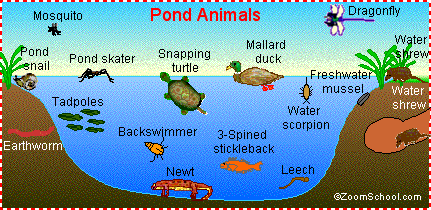

In [159]:
from IPython.display import Image
Image(filename='downloads/animal pond/1. pondanimals.gif', width=600)

In [160]:
img_contains_frog(process_img_path('downloads/animal pond/1. pondanimals.gif'))

Instructions for updating:
Colocations handled automatically by placer.
[('n03598930', 'jigsaw_puzzle', 0.8680317), ('n06359193', 'web_site', 0.06409996), ('n02834397', 'bib', 0.021264292)]


0.0

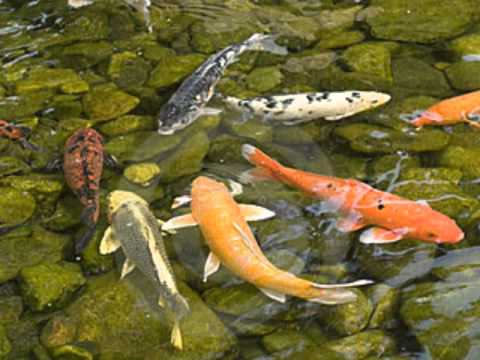

In [162]:
from IPython.display import Image
Image(filename='downloads/animal pond/2. hqdefault.jpg', width=600)

In [163]:
img_contains_frog_fish(process_img_path('downloads/animal pond/2. hqdefault.jpg'))

[('n01443537', 'goldfish', 0.8495873), ('n01631663', 'eft', 0.06760197), ('n02536864', 'coho', 0.03516337)]


0.8495873

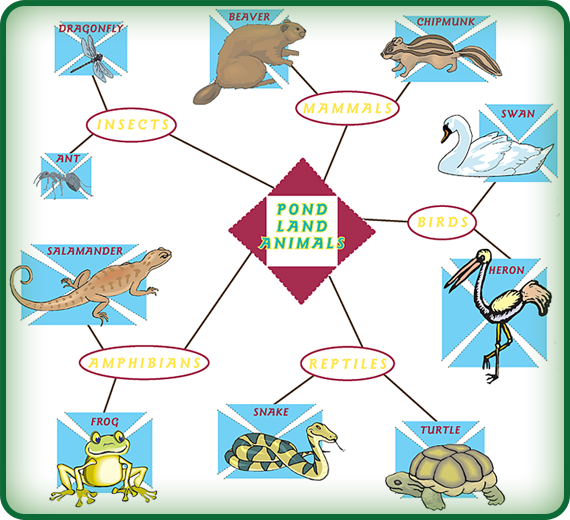

In [164]:
from IPython.display import Image
Image(filename='downloads/animal pond/3. pkls4116_inline.png', width=600)

In [168]:
img_contains_frog_fish(process_img_path('downloads/animal pond/3. pkls4116_inline.png'))

[('n04243546', 'slot', 0.87124443), ('n04476259', 'tray', 0.04993609), ('n03908618', 'pencil_box', 0.02307246)]


0.0

## Part 3 - AutoML

Use [TPOT](https://github.com/EpistasisLab/tpot) to fit a predictive model for the King County housing data, with `price` as the target output variable.

In [101]:
!pip install tpot

In [102]:
!wget https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv

--2019-04-12 09:39:05--  https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.64.133, 151.101.192.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.64.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>]   2.40M  --.-KB/s    in 0.1s    

2019-04-12 09:39:05 (17.3 MB/s) - ‘kc_house_data.csv’ saved [2515206/2515206]



In [103]:
!head kc_house_data.csv

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
"7129300520","20141013T000000",221900,3,1,1180,5650,"1",0,0,3,7,1180,0,1955,0,"98178",47.5112,-122.257,1340,5650
"6414100192","20141209T000000",538000,3,2.25,2570,7242,"2",0,0,3,7,2170,400,1951,1991,"98125",47.721,-122.319,1690,7639
"5631500400","20150225T000000",180000,2,1,770,10000,"1",0,0,3,6,770,0,1933,0,"98028",47.7379,-122.233,2720,8062
"2487200875","20141209T000000",604000,4,3,1960,5000,"1",0,0,5,7,1050,910,1965,0,"98136",47.5208,-122.393,1360,5000
"1954400510","20150218T000000",510000,3,2,1680,8080,"1",0,0,3,8,1680,0,1987,0,"98074",47.6168,-122.045,1800,7503
"7237550310","20140512T000000",1.225e+006,4,4.5,5420,101930,"1",0,0,3,11,3890,1530,2001,0,"98053",47.6561,-122.005,4760,101930
"1321400060","20140627T000000",257500,3,2.25,1715,6819,"2",0,0,3,7,1715,0,1995,0,"98003",47.3097,-122.327,2238,6819
"2

As with previous questions, your goal is to run TPOT and successfully run and report error at the end.  Also, in the interest of time, feel free to choose small `generation=1` and `population_size=10` parameters so your pipeline runs efficiently and you are able to iterate and test.

*Hint* - you'll have to drop and/or type coerce at least a few variables to get things working. It's fine to err on the side of dropping to get things running, as long as you still get a valid model with reasonable predictive power.

In [142]:
housing = pd.read_csv('kc_house_data.csv', header=0)
print(housing.shape)
housing.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [143]:
housing.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [144]:
for col in housing.select_dtypes(include='number'):
    housing[col] = housing[col].astype(float)

In [145]:
housing.dtypes

id               float64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition        float64
grade            float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
zipcode          float64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

In [146]:
housing['year'] = housing.date.apply(lambda x: int(x[:4])).astype(float)
housing['month'] = housing.date.apply(lambda x: int(x[4:6])).astype(float)
housing = housing.drop(columns=['date'], axis=1)

In [147]:
from tpot import TPOTRegressor

In [148]:
X = housing.drop('price', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(
    X, housing['price'].values, train_size=0.75, test_size=0.25)

In [151]:
%%time

tpot = TPOTRegressor(generations=5, population_size=10, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Generation 1 - Current best internal CV score: -25097790745.19403
Generation 2 - Current best internal CV score: -18526340054.489445
Generation 3 - Current best internal CV score: -18526340054.489445


TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.9500000000000001, min_samples_leaf=1, min_samples_split=9, n_estimators=100)
-17015248234.71509
CPU times: user 11min 57s, sys: 11.9 s, total: 12min 9s
Wall time: 11min 33s


### No time to run to get better results

## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
  - I'm strong at picking things up fast, and applying them to the problem at hand. Also, a business-oriented approach is better to solving business problems, and I think I would do good in such situations.
- What area of Data Science would you most like to learn more about, and why?
  - I would like to keep digging into Statistics. Most of the datasets out there are multi-dimensional. We cannot view them, so we have to use Statistics to understand which features are good for those datasets. It is also a skill that not many people want to learn, so it will be a good addition to my toolbox.
- Where do you think Data Science will be in 5 years?
  - I think Data Science automation will continue to improve. We will still have jobs, though since feature selection, and cleaning datasets will be required. Also at the end we will have to decide if the model has overfit the data. That is not something anything like TPOT/autoML can do. I think it will always be that way, since each dataset is present in context of a business problem, and we will always be needed to figure out if a certain way of approaching a problem lead to a good solution.

A few sentences per answer is fine - only elaborate if time allows.

Thank you for your hard work, and congratulations! You've learned a lot, and should proudly call yourself a Data Scientist.